# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
f=ma = m \frac{\mathrm{d}^2x}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

### Hint
b. You may need to make the time step small enough so that the elliptical orbit closes uponitself, as it should, and the number of steps large enough such that the orbits just repeat.

c. Experiment with the initial conditions until you find the ones that produce a circular orbit (a special case of an ellipse).

Reference:

[1]. Computational Physics Problem Solving with Computers Chapter 9.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import scipy.integrate as scin
import pandas as pd

## Solución:
**a)** Suponiendo que las constantes de GM = 1, entonces las ecuaciones anteriores se pueden escribir como:

$$\frac{d^{2}x}{dt^2} = -\frac{x}{\left(x^2+y^2 \right)^{3/2}}$$
$$ \frac{\mathrm{d}^2y}{\mathrm{d}t^2}= -\frac{y}{\left(x^2+y^2 \right)^{3/2}}$$

Lo cual puede escribirse como:

$$ \ddot{x} = -\frac{x}{\left(x^2+y^2 \right)^{3/2}} $$
$$ \ddot{y} = -\frac{y}{\left(x^2+y^2 \right)^{3/2}} $$

Sea $\ddot{x} = \dot{v_x}$, $\ddot{y} = \dot{v_y}$, entonces podemos escribir que:

$$ \dot{v_x} = -\frac{x}{\left(x^2+y^2 \right)^{3/2}} $$
$$ \ddot{v_y} = -\frac{y}{\left(x^2+y^2 \right)^{3/2}} $$

Sea $z_0 = x, z_1 = y, z_2 = v_x, z_3 = v_y$.

Podemos escribir entonces el siguiente sistema de ecuaciones acopladas:
$$\dot{z_0} = \dot{x} = z_2$$
$$\dot{z_1} = \dot{y} = z_3$$
$$\dot{z_2} = -\frac{z_0}{\left((z_0)^2+(z_1)^2 \right)^{3/2}}$$
$$\dot{z_1} = -\frac{z_1}{\left((z_0)^2+(z_1)^2 \right)^{3/2}}$$


In [51]:
def Ffunc(Z,t):
    dz0dt = Z[2]
    dz1dt = Z[3]
    dz2dt = -Z[0]/((Z[0])**2+(Z[1]**2))**(1.5)
    dz3dt = -Z[1]/((Z[0])**2+(Z[1]**2))**(1.5)
    
    return np.array([dz0dt,dz1dt,dz2dt,dz3dt])
    
# En este caso no tenemos parámetros adicionales a las variables, escribamos entonces las condiciones inciales

U0 = np.array([0.5, 0.0, 0.0, 1.63]) #[x(0), y(0), v_x(0), v_y(0)]
t=np.linspace(0,30,1000)
sol=scin.odeint(Ffunc,U0,t)

In [52]:
# Asignemos los valores a cada una de las variables
x,y,v_x,v_y = sol[:,0],sol[:,1],sol[:,2],sol[:,3]

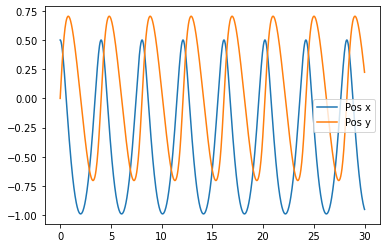

In [53]:
# Grafiquemos las posición de x con respecto al tiempo
plt.plot(t,x,label='Pos x')
plt.plot(t,y,label='Pos y')
plt.legend()

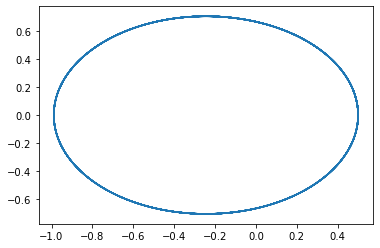

In [70]:
plt.figure()
plt.plot(x,y)

**Análisis:** Al gráficar los valores de x vs. y, obtenemos una figura elíptica lo cual se corresponde, en general, a la órbita de un planeta por la segunda ley de kepler. De esta forma tenemos que los ciclos antes mostrados generan la continua trayectoria sobre la elipse del planeta. 

**c)** Cambiando las condiciones iniciales para que la elipse se convierta en circunferencia tenemos

In [71]:
U02 = np.array([1, 0, 0, 1]) #[x(0), y(0), v_x(0), v_y(0)]
t2=np.linspace(0,30,1000)
sol2=scin.odeint(Ffunc,U02,t2)
x2,y2,v_x2,v_y2 = sol2[:,0],sol2[:,1],sol2[:,2],sol2[:,3]

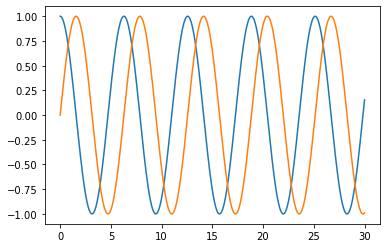

In [72]:
plt.figure()
plt.plot(t,x2)
plt.plot(t,y2)

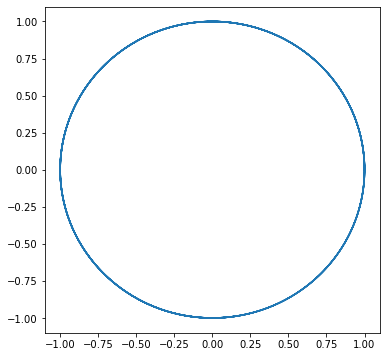

In [73]:
plt.figure(figsize=(6,6))
plt.plot(x2,y2)

# Ajuste 
2. En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente: 

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una gráfica de el angulo como función del tiempo:

```
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

```

¿Qué puede concluir respecto al movimiento del pendulo?


- Emplee un modelo de oscilador armónico amortiguado para realizar el fit de los datos.

\begin{equation}
x(t) = A e^{-b t} \sin(\omega t + \phi) 
\end{equation}

¿Cuales son los valores de A, $\omega$, $\phi$ y $b$. 

  

Ayuda:
- Para pasar los puntos y a comas dentro del data frame, puede emplear la siguiente instrucción:

```
df["AnguloDeg"].str.replace(",",".").astype(float)
```

- Si el modelo no converge, pude intentar intuir el valor de $\omega$  de la gráfica y definir este valor como constante en la función de ajuste. Esto ayudará al algoritmo a buscar el ajuste optimo.  Tambien podria intentar buscar el parametro b, realizando un fit de los máximos de la curva.

In [12]:
# Importemos el Dataset

Angles = pd.read_csv('Pendulo_simple.csv',sep=';')
pi = np.pi
Angles

,Tiempo (ms),Ángulo 1
0,9,"59,0289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,0049247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [13]:
# Cambiemos el nombre de Ángulo 1 a Ángulo Deg

Angles=Angles.rename(columns={'Ángulo 1':'Ángulo Deg'})
Angles

,Tiempo (ms),Ángulo Deg
0,9,"59,0289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,0049247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [14]:
# Para poder hacer operaciones con los valores cambiemos las comas decimales a puntos

Angles["Ángulo Deg"] = Angles["Ángulo Deg"].str.replace(",",".").astype(float)
Angles

,Tiempo (ms),Ángulo Deg
0,9,59.028961
1,42,59.982327
2,75,61.237453
3,108,63.004925
4,142,65.388771
...,...,...
2842,94709,94.937576
2843,94743,96.479851
2844,94776,97.940689
2845,94809,99.318092


In [15]:
Angles['Ángulo Rad'] = (Angles['Ángulo Deg']*pi)/180
Angles

,Tiempo (ms),Ángulo Deg,Ángulo Rad
0,9,59.028961,1.030250
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.004925,1.099643
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


Text(0, 0.5, 'Ángulo [rad]')

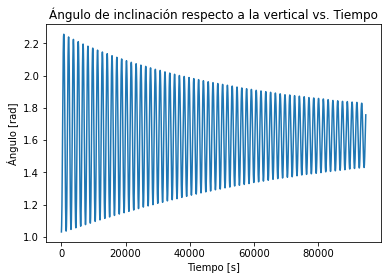

In [100]:


plt.plot(Angles["Tiempo (ms)"],Angles["Ángulo Rad"])
plt.title("Ángulo de inclinación respecto a la vertical vs. Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Ángulo [rad]")

**Análisis del gráfico:** Al analizar este gráfico podemos observar que las oscilaciones están disminuyendo su amplitud con respescto al tiempo, por lo que tenemos un péndulo débilmente amortiguado, lo cual puede deberse a la fricción con el aire.

Text(0, 0.5, 'Ángulo [rad]')

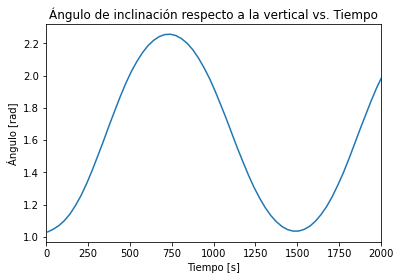

In [47]:
# Hagamos un zoom para hallar el valor del periodo con el que se repiten las oscilaciones

plt.plot(Angles["Tiempo (ms)"],Angles["Ángulo Rad"])
plt.title("Ángulo de inclinación respecto a la vertical vs. Tiempo")
plt.xlim(0,2000)
plt.xlabel("Tiempo [s]")
plt.ylabel("Ángulo [rad]")

In [102]:
# Vemos T es de aproximadamente 1500 ms, luego:

w = 2*np.pi/1.5 # Usando el valor de tiempo en segundos
w

4.1887902047863905

In [60]:
# Debido a que la función curve_fit no puede extraer los 4 parámetros de forma directa encontremos los puntos
# máximos de la función y hagamos un fit para obtener A*e^{-bt}, y de ahí obtener A,b:

# Hallamos el valor máximo en cada intervalo

# Consideramos primero hacer las particiones como se muestra en la gráfica cada 1500 ms aprox.

# Calculemos el número de intervalos a considerar
Maxt = 94843/1500
Maxt

63.22866666666667

In [85]:
# Tomemos un conjunto de valores asociados al tiempo en el máximo valor de cada intervalo anterior
intervalos = [Angles.query(f"{1500*i}<`Tiempo (ms)`<{1500*(i+1)}").iloc[:,:] for i in range(62)]
intervalos

[    Tiempo (ms)  Ángulo Deg  Ángulo Rad
 0             9   59.028961    1.030250
 1            42   59.982327    1.046889
 2            75   61.237453    1.068795
 3           108   63.004925    1.099643
 4           142   65.388771    1.141249
 5           175   68.413666    1.194044
 6           209   72.056122    1.257617
 7           242   76.260178    1.330991
 8           275   80.945251    1.412761
 9           308   86.006317    1.501093
 10          342   91.309113    1.593645
 11          375   96.696548    1.687673
 12          409  102.005066    1.780324
 13          442  107.075996    1.868829
 14          475  111.767578    1.950712
 15          508  115.973320    2.024116
 16          542  119.630928    2.087954
 17          575  122.713211    2.141750
 18          608  125.211273    2.185349
 19          642  127.121094    2.218682
 20          675  128.437958    2.241665
 21          708  129.157516    2.254224
 22          742  129.278931    2.256343
 23          775

In [81]:
Posmaxint = [np.argmax(intervalos[j].iloc[:,2]) for j in range(62)]
Posmaxint

[22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17]

In [89]:
Maxint = [[intervalos[j].iloc[Posmaxint[j],0] for j in range(62)],[intervalos[j].iloc[Posmaxint[j],2] for j in range(62)]]

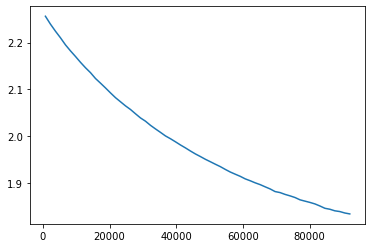

In [90]:
plt.plot(Maxint[0],Maxint[1])

In [96]:
# Ahora que tenemos el aporte de decaimiento en la amplitud encontremos la función que se ajusta a la curva

def fitFunc(t, A, b): return A*np.exp(-b*t)

p, cov = curve_fit(fitFunc, Maxint[0], Maxint[1])
p

array([1., 1.])

In [101]:
# Luego tenemos que los parámetros A,b están dados por:

A,b = p[0],p[1]
print(f"Así, el valor de la amplitud 'A' es {A} y el término de la exponencial es 'b' es {b}")

Así, el valor de la amplitud 'A' es 1.0 y el término de la exponencial es 'b' es 1.0


Finalmente, el valor de $\phi$, lo hallamos usando condición inicial y puesto que sabemos el valor de $\theta$, entonces haciendo la aproximación de $9 ms = 0 s$, tenemos:

$$\theta(0) = A sin(\phi)$$
$$\phi = \sin^{-1} (\theta(0)) $$

In [106]:
# Pero como el valor de theta en 0 es mayor a 1 entonces el valor de phi sale al considerar theta(0)-1

phi = np.arcsin(Angles.iloc[0,2]-1)
phi

0.030254341867253943

In [104]:
Angles.iloc[0,2]

1.030249726651551

In [107]:
# Así, tenemos que los parámetros que queríamos obtener son:

print(f"A = {A}, b = {b}, w = {w}, phi = {phi}")


A = 1.0, b = 1.0, w = 4.1887902047863905, phi = 0.030254341867253943
